<a href="https://colab.research.google.com/github/palayushi293/Fertilizer/blob/main/fertilizer_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:


from google.colab import files
uploaded = files.upload()

Saving Fertilizer Prediction.csv to Fertilizer Prediction.csv


In [4]:
df=pd.read_csv('/content/Fertilizer Prediction.csv')

In [5]:
df.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


In [6]:
df.isnull().sum()

,0
Temparature,0
Humidity,0
Moisture,0
Soil Type,0
Crop Type,0
Nitrogen,0
Potassium,0
Phosphorous,0
Fertilizer Name,0


In [7]:
df.describe()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,30.282828,59.151515,43.181818,18.909091,3.383838,18.606061
std,3.502304,5.840331,11.271568,11.599693,5.814667,13.476978
min,25.000000,50.000000,25.000000,4.000000,0.000000,0.000000
25%,28.000000,54.000000,34.000000,10.000000,0.000000,9.000000
50%,30.000000,60.000000,41.000000,13.000000,0.000000,19.000000
75%,33.000000,64.000000,50.500000,24.000000,7.500000,30.000000
max,38.000000,72.000000,65.000000,42.000000,19.000000,42.000000


In [8]:
df['Fertilizer Name'].unique()

array(['Urea', 'DAP', '14-35-14', '28-28', '17-17-17', '20-20',
       '10-26-26'], dtype=object)

In [11]:
df['Fertilizer Name'].count()

99

In [12]:
df.tail()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
94,25,50,32,Clayey,Pulses,24,0,19,28-28
95,30,60,27,Red,Tobacco,4,17,17,10-26-26
96,38,72,51,Loamy,Wheat,39,0,0,Urea
97,36,60,43,Sandy,Millets,15,0,41,DAP
98,29,58,57,Black,Sugarcane,12,0,10,20-20


In [13]:
import seaborn as sns

In [19]:
print(df.columns)

Index(['Temparature', 'Humidity ', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name'],
      dtype='object')


<Axes: ylabel='Temparature'>

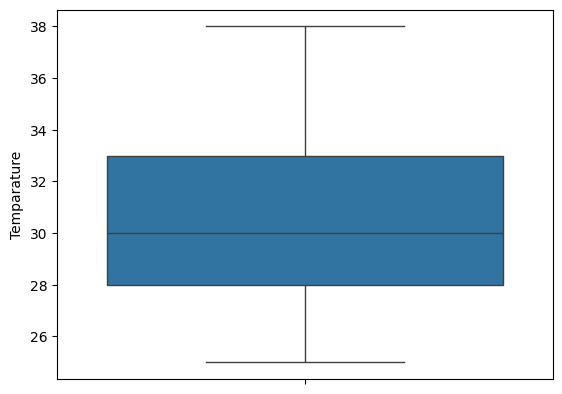

In [15]:
sns.boxplot(df['Temparature'])

<Axes: ylabel='Moisture'>

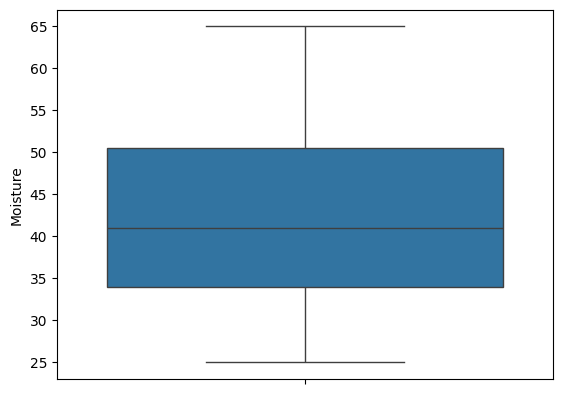

In [20]:
sns.boxplot(df['Moisture'])

<Axes: ylabel='Nitrogen'>

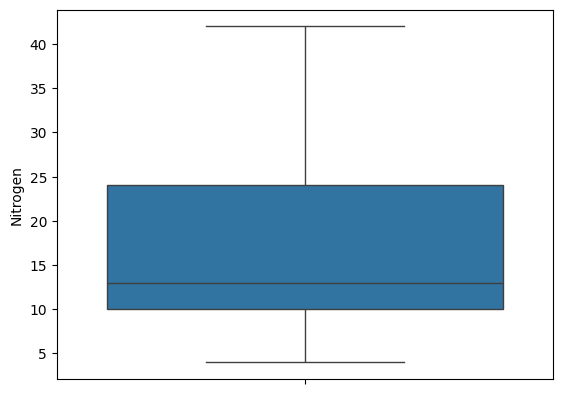

In [21]:
sns.boxplot(df['Nitrogen'])

<Axes: ylabel='Potassium'>

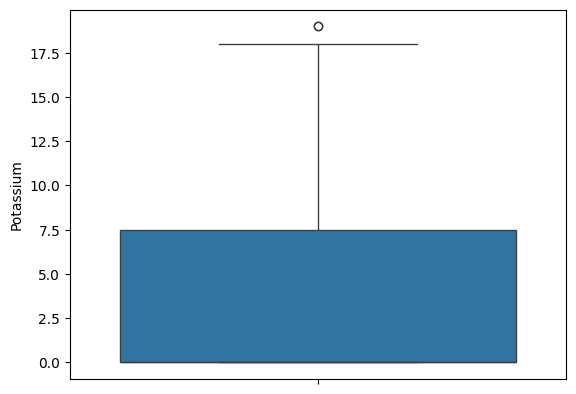

In [22]:
sns.boxplot(df['Potassium'])

<Axes: ylabel='Phosphorous'>

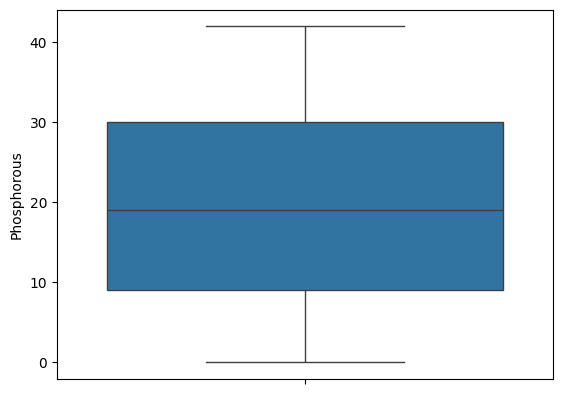

In [23]:
sns.boxplot(df['Phosphorous'])

In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
label=LabelEncoder()

In soil type==

in soil type 1== CLAYEY==4
RED==2
LOAMY==0
SANDY==3
BLACK==1



> Add **blockquote**
K



In [31]:
df['Soil Type']=label.fit_transform(df['Soil Type'])

In [28]:
df['Crop Type']=label.fit_transform(df['Crop Type'])

In [29]:
df['Fertilizer Name']=label.fit_transform(df['Fertilizer Name'])

In [30]:
df

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,4,3,37,0,0,6
1,29,52,45,2,8,12,0,36,5
2,34,65,62,0,1,7,9,30,1
3,32,62,34,3,9,22,0,20,4
4,28,54,46,1,6,35,0,0,6
...,...,...,...,...,...,...,...,...,...
94,25,50,32,1,7,24,0,19,4
95,30,60,27,3,9,4,17,17,0
96,38,72,51,2,10,39,0,0,6
97,36,60,43,4,4,15,0,41,5


In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
s=StandardScaler()

In [35]:
df['Temperature']=s.fit_transform(df[['Temparature']])

df['Moisture']=s.fit_transform(df[['Moisture']])
df['Nitrogen']=s.fit_transform(df[['Nitrogen']])
df['Potassium']=s.fit_transform(df[['Potassium']])
df['Phosphorous']=s.fit_transform(df[['Phosphorous']])

In [36]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [38]:
x=df[['Temperature','Moisture','Nitrogen','Potassium','Phosphorous','Crop Type','Soil Type']]
y=df[['Fertilizer Name']]

In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
r=RandomForestClassifier(n_estimators=100,random_state=42)

In [43]:
r.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(random_state=42)

In [44]:
ypred=r.predict(x_test)

In [45]:
print(accuracy_score(y_test,ypred))

0.95


In [51]:
from sklearn.tree import DecisionTreeClassifier

In [52]:
deci=DecisionTreeClassifier()

In [53]:
deci.fit(x_train,y_train)

DecisionTreeClassifier()

In [54]:
ypred=deci.predict(x_test)

In [55]:
print(accuracy_score(y_test,ypred))

1.0


In [57]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

AS WE HAve the highest accuracy which is 100% using DECISIION tree
so we are using decision tree


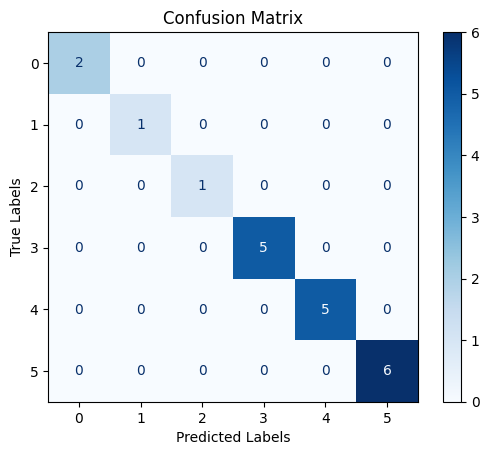

In [59]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [60]:

from sklearn.metrics import mean_squared_error

In [62]:
mse = mean_squared_error(y_test, ypred)
print("error", mse)

error 0.0
